# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks



---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).(())

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

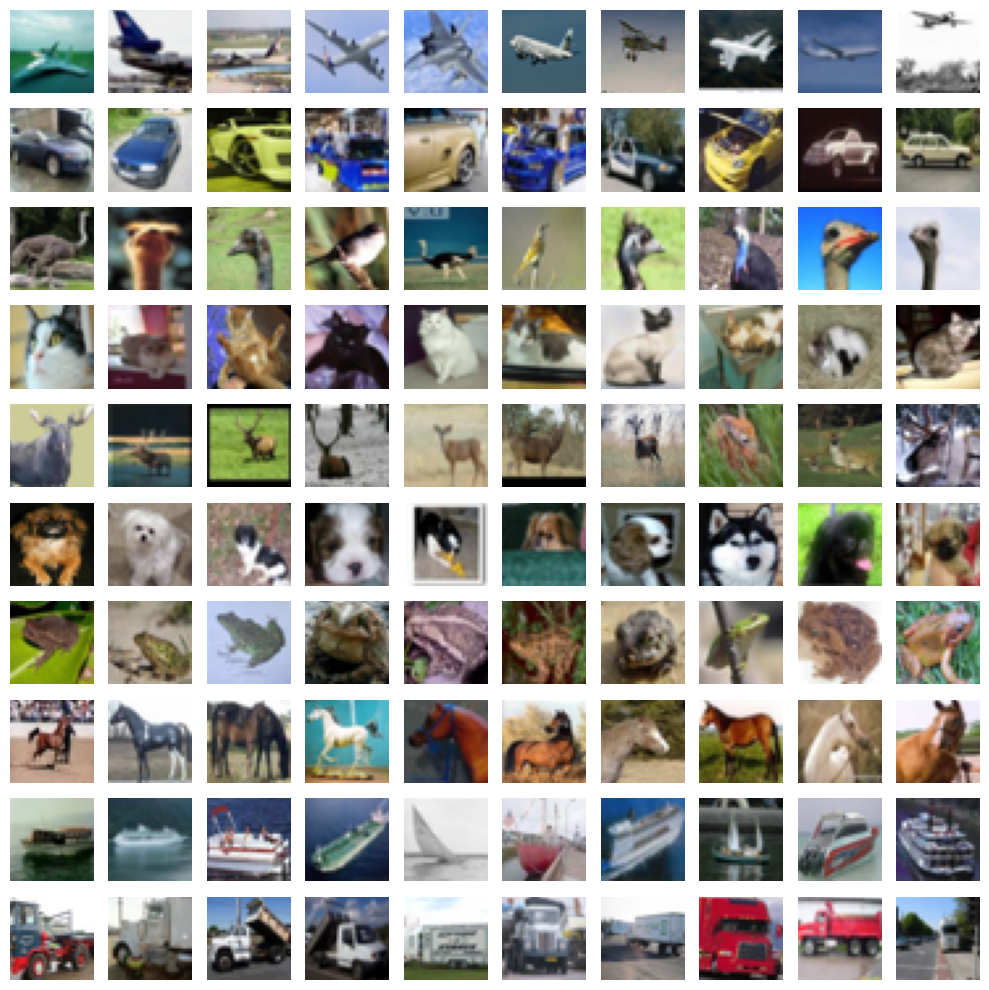

In [16]:
# Normalize the images (scale pixel values between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define class names for CIFAR-10 dataset
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Convert labels to one-hot encoded form
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Create a 10x10 plot showing 10 random samples from each class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    selected_indices = np.random.choice(class_indices, 10, replace=False)
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(X_train[selected_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(class_names[i], fontsize=8, rotation=90, labelpad=10)

plt.tight_layout()
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [12]:
from keras.backend import clear_session
clear_session()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [24]:
from tensorflow.keras.optimizers import SGD
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot),
                    epochs=50, batch_size=512, verbose=1)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1591 - loss: 2.2795 - val_accuracy: 0.2442 - val_loss: 2.1858
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2524 - loss: 2.1518 - val_accuracy: 0.2719 - val_loss: 2.0547
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2896 - loss: 2.0286 - val_accuracy: 0.3159 - val_loss: 1.9676
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3193 - loss: 1.9532 - val_accuracy: 0.3208 - val_loss: 1.9205
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3392 - loss: 1.8989 - val_accuracy: 0.3453 - val_loss: 1.8818
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3488 - loss: 1.8733 - val_accuracy: 0.3606 - val_loss: 1.8428
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3572 - loss: 1.8452 - val_accuracy: 0.3594 - val_loss: 1.8277
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3648 - loss: 1.8179 - val_accuracy: 0.3544 - v

*   Plot the cross entropy loss curve and the accuracy curve

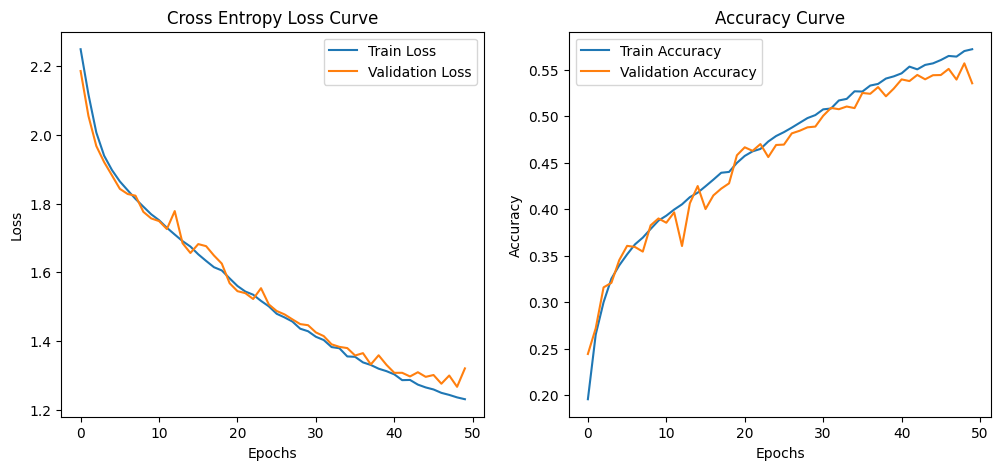

In [25]:
import matplotlib.pyplot as plt
# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [26]:
from keras.backend import clear_session
clear_session()

In [27]:
# Define the deeper VGG-inspired model
vgg_model = Sequential([
    # convolutional vgg like block
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [29]:
vgg_model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history_vgg = vgg_model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot),
                            epochs=50, batch_size=512, verbose=1)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.1618 - loss: 2.2670 - val_accuracy: 0.2512 - val_loss: 2.1400
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2579 - loss: 2.0973 - val_accuracy: 0.3047 - val_loss: 2.0211
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2988 - loss: 1.9886 - val_accuracy: 0.3312 - val_loss: 1.9072
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3288 - loss: 1.9239 - val_accuracy: 0.3423 - val_loss: 1.8577
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3477 - loss: 1.8641 - val_accuracy: 0.3409 - val_loss: 1.8426
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3597 - loss: 1.8225 - val_accuracy: 0.3744 - val_loss: 1.7752
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3815 - loss: 1.7713 - val_accuracy: 0.3697 - val_loss: 1.7646
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3910 - loss: 1.7365 - val_accuracy: 0.4010 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


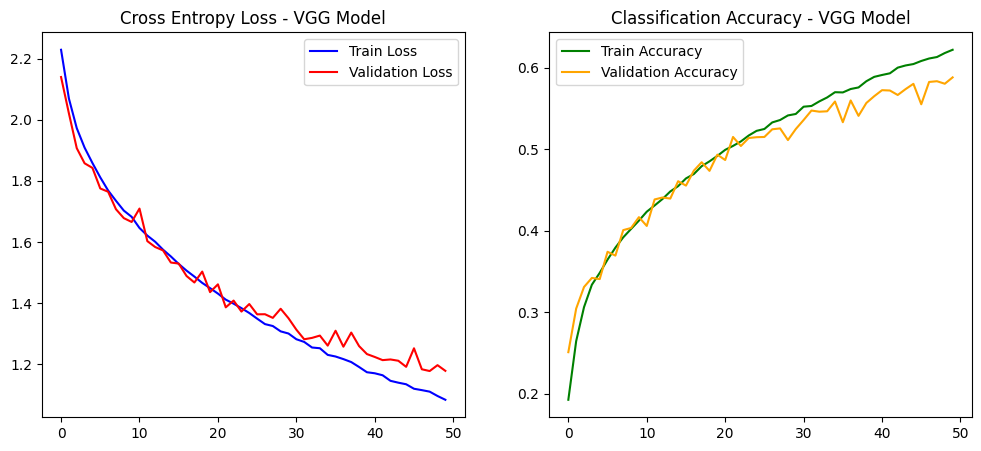

In [30]:
# Plot Loss and Accuracy Curves for the deeper model
plt.figure(figsize=(12, 5))

# Plot Cross Entropy Loss
plt.subplot(1, 2, 1)
plt.title('Cross Entropy Loss - VGG Model')
plt.plot(history_vgg.history['loss'], label='Train Loss', color='blue')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss', color='red')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.title('Classification Accuracy - VGG Model')
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend()

plt.show()

**Comment on the observation**

after plot we can observe that originally we had accuracy: 0.5762 - loss: 1.2238

and now we've got
accuracy: 0.6213 - loss: 1.0824

so the model did improved

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix

predictions= vgg_model.predict(X_test)
print(predictions[0])

# Convert predictions to class labels using argmax
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix using predicted labels
gt = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[8.2600012e-02 6.4336342e-01 1.3942910e-04 5.9057660e-05 3.2551066e-05
 1.9964662e-06 1.8108103e-05 7.3086503e-06 2.4910188e-01 2.4676284e-02]


In [69]:
cm=confusion_matrix(gt, predicted_labels)

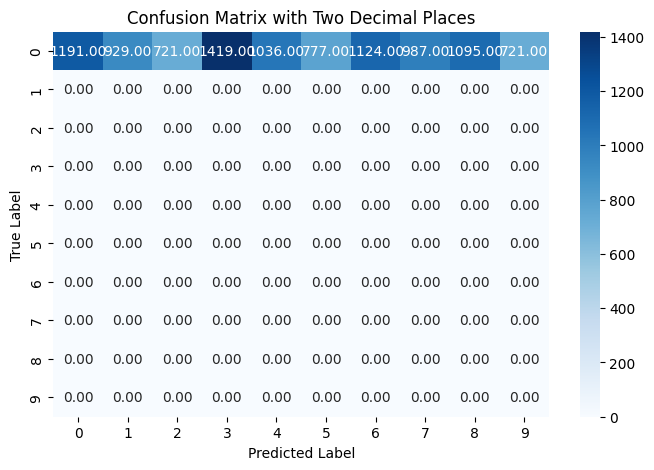

In [71]:
#Plot formatted confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f")  # Display numbers with 2 decimal places
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with Two Decimal Places")
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [51]:
# Evaluate test accuracy
test_loss, test_acc = vgg_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy of VGG Model: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5892 - loss: 1.1721
Test Accuracy of VGG Model: 0.5884


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [72]:
from keras.backend import clear_session
clear_session()

In [75]:
import tensorflow as tf
# Resize CIFAR-10 images to (64, 64, 3) using UpSampling2D
X_train_resized = tf.image.resize(X_train, (64, 64))
X_test_resized = tf.image.resize(X_test, (64, 64))


# Define the complete VGG-like model architecture
vgg_complete_model = Sequential([
    # First convolutional block (64 filters)
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional block (128 filters)
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Third convolutional block (256 filters)
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [76]:
vgg_complete_model.compile(loss='categorical_crossentropy',
                           optimizer=SGD(),
                           metrics=['accuracy'])

# Train the model for 10 epochs with a batch size of 512
history_vgg_complete = vgg_complete_model.fit(X_train_resized, y_train_one_hot, validation_data=(X_test_resized, y_test_one_hot),
                                              epochs=10, batch_size=512, verbose=1)



Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 756ms/step - accuracy: 0.1117 - loss: 2.2991 - val_accuracy: 0.1716 - val_loss: 2.2866
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 368ms/step - accuracy: 0.1711 - loss: 2.2777 - val_accuracy: 0.2336 - val_loss: 2.2114
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - accuracy: 0.2344 - loss: 2.1698 - val_accuracy: 0.2587 - val_loss: 2.0674
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 368ms/step - accuracy: 0.2606 - loss: 2.0681 - val_accuracy: 0.3040 - val_loss: 1.9695
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.2921 - loss: 1.9921 - val_accuracy: 0.3279 - val_loss: 1.8917
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.3165 - loss: 1.9199 - val_accuracy: 0.3445 - val_loss: 1.8460
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.3361 - loss: 1.8611 - val_accuracy: 0.3628 - val_loss: 1.7826
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 371ms/step - accuracy: 0.3575 - loss: 1.8229 - val_acc

In [77]:
# Evaluate test accuracy
test_loss, test_acc = vgg_complete_model.evaluate(X_test_resized, y_test_one_hot, verbose=1)
print(f"Test Accuracy of Complete VGG Model: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3783 - loss: 1.7683
Test Accuracy of Complete VGG Model: 0.3855


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


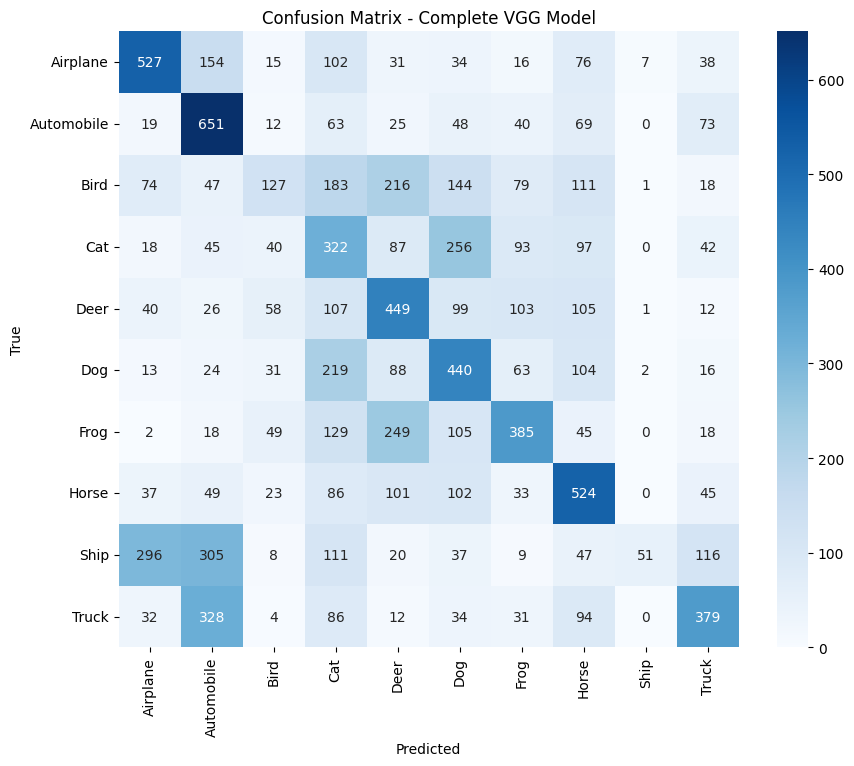

In [80]:
# Predict test set outputs
preditions_VGG_Complete = vgg_complete_model.predict(X_test_resized)
predict_VGG_Labels = preditions_VGG_Complete.argmax(axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predict_VGG_Labels)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Complete VGG Model")
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:


Enabling the network to learn non-linear mappings.
Preventing vanishing/exploding gradient problems (with appropriate choices).


Allowing for different decision boundaries (e.g., classification vs. regression).



2 - Key Differences between sigmoid and softmax:


Use Sigmoid for binary classification problems.


Use Softmax for multi-class classification, where each class has a probability.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:


Use Binary Crossentropy for binary classification (e.g., yes/no, spam/not spam).


Use Categorical Crossentropy for multi-class classification with one-hot encoded labels.

